In [44]:
import pandas as pd
from unidecode import unidecode
import unicodedata

In [45]:
df = pd.read_csv('data/tracks.csv', parse_dates=['release_date'])

In [46]:
# Tratando a string como lista e pegando o primeiro artista principal
from ast import literal_eval
df['artist'] = df['artists'].apply(lambda x: literal_eval(x)[0])

In [47]:
# Remove dados fantasma
df = df[df['name'].notna()]

In [48]:
entries = pd.read_csv('data/billboard_hot_100_definitive.csv', parse_dates=['date'])

In [49]:
entries.head(5)

,name,artist,rank,weeks,date
0,All I Want For Christmas Is You,Mariah Carey,1,50,2022-01-01
1,Rockin' Around The Christmas Tree,Brenda Lee,2,44,2022-01-01
2,Jingle Bell Rock,Bobby Helms,3,41,2022-01-01
3,A Holly Jolly Christmas,Burl Ives,4,25,2022-01-01
4,Easy On Me,Adele,5,11,2022-01-01


In [50]:
def is_latin(s):
    for c in s:
        if c.isascii():  # checks for numbers, English letters, spaces, and punctuation
            continue
        try:
            if 'LATIN' not in unicodedata.name(c):
                return False
        except ValueError:
            return False
    return True

In [51]:
# Remove dados com música não em alfabeto latino
df = df[df['name'].apply(is_latin)]


In [52]:
# Remove acentos e caracteres especiais
df['name'] = df['name'].apply(unidecode)
df['artist'] = df['artist'].apply(unidecode)

<Axes: >

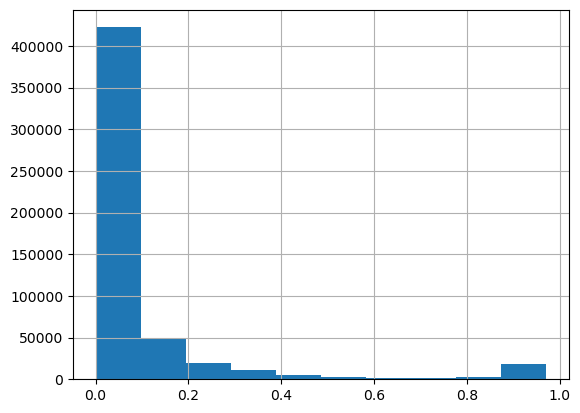

In [53]:
df['speechiness'].hist()

<Axes: >

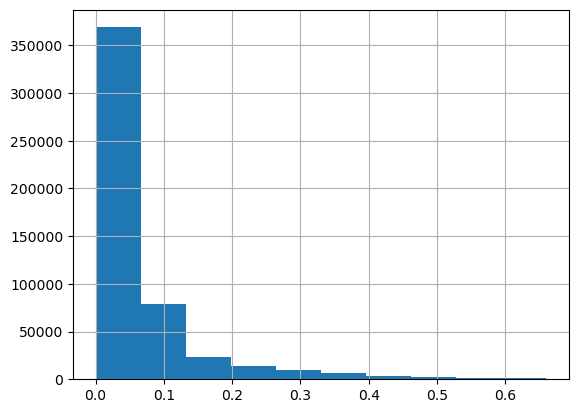

In [54]:
df = df[df['speechiness'] <= 0.66]
df['speechiness'].hist()

In [55]:
billboard = entries.sort_values('date', ascending=False)
billboard['cumulative_artist_appearances'] = billboard.groupby('artist').cumcount(ascending=False)
billboard = billboard.sort_values(by=['date'], ascending=False).drop_duplicates(['name', 'artist'], keep='last')
billboard.loc[billboard['artist'] == 'Big Time Rush']

,name,artist,rank,weeks,date,cumulative_artist_appearances
49496,Windows Down,Big Time Rush,97,1,2012-07-14,13
56478,Boyfriend,Big Time Rush,79,1,2011-03-12,2
57278,Big Night,Big Time Rush,79,1,2011-01-15,1
60792,Halfway There,Big Time Rush,93,1,2010-05-15,0


In [56]:
# Por alguma razão, algumas músicas aparecem repetidas diversas vezes com 
# variações mínimas nas features de audio, portanto é necessario filtra-las
new_df = df.sort_values(by='release_date').drop_duplicates(['name', 'artist'], keep='first')
new_df.loc[(df['artist'] == 'Big Time Rush')][['name', 'artist', 'release_date']]

,name,artist,release_date
84002,Any Kind of Guy,Big Time Rush,2010-02-02
156379,Big Time Rush,Big Time Rush,2010-04-09
397551,Halfway There,Big Time Rush,2010-04-27
397586,Famous,Big Time Rush,2010-06-29
397592,City Is Ours,Big Time Rush,2010-08-03
468010,Count On You (feat. Jordin Sparks),Big Time Rush,2010-10-11
119209,Til I Forget About You,Big Time Rush,2010-10-11
119203,Boyfriend,Big Time Rush,2010-10-11
119206,Worldwide,Big Time Rush,2010-10-11
468101,If I Ruled the World (feat. Iyaz),Big Time Rush,2011-01-01


In [57]:
new_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist
478627,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,19,233920,0,['Los Pincheira del Sur'],['1BnQrx8p0bHBpidjIGq26z'],1900-01-01,0.659,0.791,...,-4.895,1,0.0295,0.13900,0.000002,0.161,0.956,141.999,4,Los Pincheira del Sur
132326,1Jl19I7NAHgnvrlg6HIzK9,Help me,0,177367,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,0.358,0.456,...,-4.728,1,0.0380,0.57500,0.000003,0.340,0.317,120.169,4,Abe Lyman's Orchestra
132354,3IshNqd3sMjHvtj97sUtyB,Hullabaloo,0,167963,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,0.842,0.720,...,-6.756,1,0.0817,0.96100,0.242000,0.265,0.842,119.110,4,Abe Lyman's Orchestra
132355,3KfDZww1OqQK8yUiYpSkyX,Jeannine,0,176218,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,0.146,0.635,...,-7.811,0,0.0458,0.99000,0.797000,0.524,0.443,83.640,4,Abe Lyman's Orchestra
132356,3MgGOqoHw1N0TQaL8gAoI3,On the Alamo,0,207177,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922-01-01,0.280,0.482,...,-5.019,1,0.0351,0.99500,0.770000,0.234,0.520,175.163,4,Isham Jones & His Orchestra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188863,1NCLXNEEpUtSV8eS7me71G,Tu Verdad,0,205120,0,['J Balvin'],['1vyhD5VmyZ7KMfW5gqLgo5'],2021-04-16,0.777,0.642,...,-6.657,0,0.0566,0.17600,0.000015,0.178,0.589,115.930,4,J Balvin
94264,43H6Jrn6CIa7xnfKL79vE6,This Time Around,0,162820,0,['Wiz Khalifa'],['137W8MRPWKqSmrBGDBFSop'],2021-04-16,0.775,0.656,...,-4.724,0,0.0732,0.09990,0.000001,0.142,0.755,157.010,4,Wiz Khalifa
188822,54TI5Pf1OG2sEEPebJVr88,Catching Feelings,0,234680,0,['Justin Bieber'],['1uNFoZAHBGtllmzznpCI3s'],2021-04-16,0.325,0.541,...,-6.665,1,0.0414,0.35300,0.000000,0.350,0.363,85.169,4,Justin Bieber
94240,7uHMx3E8in607GoKRv1Kcx,Spicy,0,143375,0,"['Ty Dolla $ign', 'Post Malone']","['7c0XG5cIJTrrAgEC3ULPiq', '246dkjvS1zLTtiykXe...",2021-04-16,0.782,0.510,...,-5.724,0,0.0419,0.14300,0.000000,0.115,0.118,99.993,4,Ty Dolla $ign


## Construção da feature de aparições prévias de um artista no lançamento da música

In [58]:
# merged_df = pd.merge(df, sanitized_entries, how='left', on=['name', 'artist']).drop(columns=['id', 'artists', 'id_artists', 'popularity','time_signature']).drop_duplicates(['name', 'artist'], keep='first').reset_index(drop=True)
merged_df = pd.merge(new_df, billboard, how='left', on=['name', 'artist']).drop(columns=['id', 'artists', 'id_artists', 'popularity']).reset_index(drop=True)
merged_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,Maldita sea la primera vez,233920,0,1900-01-01,0.659,0.791,2,-4.895,1,0.0295,...,0.000002,0.161,0.956,141.999,4,Los Pincheira del Sur,NaN,NaN,NaT,NaN
1,Help me,177367,0,1922-01-01,0.358,0.456,3,-4.728,1,0.0380,...,0.000003,0.340,0.317,120.169,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
2,Hullabaloo,167963,0,1922-01-01,0.842,0.720,3,-6.756,1,0.0817,...,0.242000,0.265,0.842,119.110,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
3,Jeannine,176218,0,1922-01-01,0.146,0.635,8,-7.811,0,0.0458,...,0.797000,0.524,0.443,83.640,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
4,On the Alamo,207177,0,1922-01-01,0.280,0.482,9,-5.019,1,0.0351,...,0.770000,0.234,0.520,175.163,4,Isham Jones & His Orchestra,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451305,Tu Verdad,205120,0,2021-04-16,0.777,0.642,11,-6.657,0,0.0566,...,0.000015,0.178,0.589,115.930,4,J Balvin,NaN,NaN,NaT,NaN
451306,This Time Around,162820,0,2021-04-16,0.775,0.656,6,-4.724,0,0.0732,...,0.000001,0.142,0.755,157.010,4,Wiz Khalifa,NaN,NaN,NaT,NaN
451307,Catching Feelings,234680,0,2021-04-16,0.325,0.541,3,-6.665,1,0.0414,...,0.000000,0.350,0.363,85.169,4,Justin Bieber,NaN,NaN,NaT,NaN
451308,Spicy,143375,0,2021-04-16,0.782,0.510,4,-5.724,0,0.0419,...,0.000000,0.115,0.118,99.993,4,Ty Dolla $ign,53.0,1.0,2020-11-07,68.0


In [59]:
# Pega todas as entradas que não são nulas
billboard_entries_df = merged_df[~merged_df['weeks'].isna()].reset_index(drop=True)
billboard_entries_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,I'll Be Seeing You,184093,0,1939-01-01,0.333,0.180,2,-10.083,1,0.0360,...,0.004770,0.2260,0.350,172.680,3,Frank Sinatra,78.0,1.0,1961-10-16,57.0
1,White Christmas,177480,0,1942-01-01,0.317,0.158,9,-16.485,1,0.0381,...,0.353000,0.3380,0.247,130.503,3,Bing Crosby,86.0,1.0,1958-12-22,0.0
2,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.373,9,-12.990,0,0.0932,...,0.000011,0.1030,0.493,79.855,4,Bill Withers,88.0,1.0,1971-07-17,0.0
3,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.224,3,-12.431,1,0.0935,...,0.000000,0.2840,0.620,202.481,4,Bing Crosby,36.0,1.0,2021-01-02,23.0
4,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.146,4,-16.084,0,0.0321,...,0.000000,0.2560,0.176,84.041,4,Bing Crosby,50.0,1.0,2021-01-02,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10152,Press,143792,0,2021-04-16,0.886,0.530,1,-5.738,1,0.3100,...,0.000018,0.1500,0.197,133.845,4,Cardi B,16.0,1.0,2019-06-15,165.0
10153,Relationship,215307,0,2021-04-16,0.841,0.595,2,-6.337,1,0.0624,...,0.000000,0.1200,0.300,145.995,4,Young Thug,83.0,1.0,2017-07-08,59.0
10154,Hot,193027,0,2021-04-16,0.855,0.651,0,-8.044,0,0.2340,...,0.000000,0.0772,0.559,111.992,4,Young Thug,26.0,1.0,2019-08-31,79.0
10155,Spicy,143375,0,2021-04-16,0.782,0.510,4,-5.724,0,0.0419,...,0.000000,0.1150,0.118,99.993,4,Ty Dolla $ign,53.0,1.0,2020-11-07,68.0


In [60]:
billboard_entries_df.loc[billboard_entries_df['artist'] == 'Big Time Rush']

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
8148,Halfway There,205760,0,2010-04-27,0.481,0.925,3,-2.861,1,0.102,...,0.0,0.1200,0.318,143.079,4,Big Time Rush,93.0,1.0,2010-05-15,0.0
8184,Boyfriend,201040,0,2010-10-11,0.614,0.857,1,-4.171,0,0.111,...,0.0,0.1770,0.677,164.146,4,Big Time Rush,79.0,1.0,2011-03-12,2.0
8257,Windows Down,192933,0,2011-01-01,0.619,0.931,11,-3.440,0,0.068,...,0.0,0.0996,0.820,129.957,4,Big Time Rush,97.0,1.0,2012-07-14,13.0


In [61]:
sanitized_billboard_entries_df = billboard_entries_df.sort_values(by=['artist', 'cumulative_artist_appearances'], ascending=False).copy()
# sanitized_billboard_entries_df['previous_song'] = sanitized_billboard_entries_df['name'].shift(-1)
# sanitized_billboard_entries_df = sanitized_billboard_entries_df[(sanitized_billboard_entries_df['previous_song'] != sanitized_billboard_entries_df['name']) & (sanitized_billboard_entries_df['cumulative_artist_appearances'] != 0)]
# # Necessário para casos em que um artista tem mais de uma música no top 100 como é o caso de Ariana Grande, Drake etc.
# sanitized_billboard_entries_df = sanitized_billboard_entries_df.drop_duplicates(['name', 'artist'], keep='first')
# sanitized_billboard_entries_df = sanitized_billboard_entries_df[['name', 'artist', 'release_date', 'date', 'cumulative_artist_appearances']].sort_values(by=['date'], ascending=False)
sanitized_billboard_entries_df.drop_duplicates(['name', 'artist', 'cumulative_artist_appearances']).loc[sanitized_billboard_entries_df['artist'] == 'Big Time Rush'].to_csv('data/sanitized_billboard_entries.csv', index=False)

In [62]:
billboard_entries_df.loc[billboard_entries_df['artist'] == 'BTS']

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
9469,DNA,223123,0,2017-09-18,0.598,0.775,1,-4.035,0,0.0545,...,0.0,0.0677,0.687,129.819,4,BTS,85.0,1.0,2017-10-07,0.0
9470,MIC Drop,238193,0,2017-09-18,0.667,0.889,6,-4.851,1,0.0918,...,0.0,0.0816,0.541,169.959,4,BTS,28.0,1.0,2017-12-16,4.0
9648,IDOL,222732,0,2018-08-24,0.734,0.855,9,-3.211,1,0.1180,...,0.0,0.1230,0.422,126.035,4,BTS,11.0,1.0,2018-09-08,19.0
9751,Make It Right,226321,0,2019-04-12,0.638,0.703,7,-7.874,1,0.4440,...,0.0,0.1320,0.261,105.766,4,BTS,95.0,1.0,2019-04-27,23.0
9906,Black Swan,198261,0,2020-01-17,0.719,0.758,2,-5.167,0,0.0851,...,0.0,0.1290,0.490,147.023,4,BTS,57.0,1.0,2020-02-01,32.0
9921,My Time,234458,0,2020-02-21,0.674,0.640,0,-5.139,0,0.0339,...,0.0,0.0925,0.664,99.908,4,BTS,84.0,1.0,2020-03-07,34.0
9923,ON,246381,0,2020-02-21,0.583,0.817,9,-5.146,0,0.0987,...,0.0,0.3380,0.438,105.936,4,BTS,4.0,1.0,2020-03-07,33.0
9924,Filter,180221,0,2020-02-21,0.781,0.762,10,-5.188,0,0.0626,...,0.0,0.1210,0.860,110.042,4,BTS,87.0,1.0,2020-03-07,35.0
10027,Dynamite,199054,0,2020-08-28,0.746,0.765,6,-4.410,0,0.0993,...,0.0,0.0936,0.737,114.044,4,BTS,1.0,1.0,2020-09-05,37.0
10057,Life Goes On,207481,0,2020-11-20,0.566,0.716,1,-5.733,1,0.0424,...,0.0,0.3700,0.450,81.068,4,BTS,1.0,1.0,2020-12-05,53.0


## Final touches before prediction

In [63]:
billboard_entries_df['famous_before_release'] = billboard_entries_df.apply(lambda x: 1 if x['cumulative_artist_appearances'] > 0 else 0, axis=1)
billboard_entries_df.loc[billboard_entries_df['artist'] == 'BTS'][['name', 'artist', 'cumulative_artist_appearances', 'release_date', 'date', 'famous_before_release']].sort_values('cumulative_artist_appearances', ascending=False)

,name,artist,cumulative_artist_appearances,release_date,date,famous_before_release
10059,Telepathy,BTS,56.0,2020-11-20,2020-12-05,1
10060,Fly To My Room,BTS,55.0,2020-11-20,2020-12-05,1
10063,Dis-ease,BTS,54.0,2020-11-20,2020-12-05,1
10057,Life Goes On,BTS,53.0,2020-11-20,2020-12-05,1
10062,Stay,BTS,52.0,2020-11-20,2020-12-05,1
10058,Blue & Grey,BTS,51.0,2020-11-20,2020-12-05,1
10027,Dynamite,BTS,37.0,2020-08-28,2020-09-05,1
9924,Filter,BTS,35.0,2020-02-21,2020-03-07,1
9921,My Time,BTS,34.0,2020-02-21,2020-03-07,1
9923,ON,BTS,33.0,2020-02-21,2020-03-07,1


In [64]:
total_in_billboard = len(merged_df[~merged_df['weeks'].isna()])
total_in_billboard

10157

In [65]:
len(merged_df)

451310

In [66]:
unsuccessful_df = merged_df[merged_df['weeks'].isna()].reset_index(drop=True)
unsuccessful_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,Maldita sea la primera vez,233920,0,1900-01-01,0.659,0.791,2,-4.895,1,0.0295,...,0.000002,0.1610,0.956,141.999,4,Los Pincheira del Sur,NaN,NaN,NaT,NaN
1,Help me,177367,0,1922-01-01,0.358,0.456,3,-4.728,1,0.0380,...,0.000003,0.3400,0.317,120.169,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
2,Hullabaloo,167963,0,1922-01-01,0.842,0.720,3,-6.756,1,0.0817,...,0.242000,0.2650,0.842,119.110,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
3,Jeannine,176218,0,1922-01-01,0.146,0.635,8,-7.811,0,0.0458,...,0.797000,0.5240,0.443,83.640,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
4,On the Alamo,207177,0,1922-01-01,0.280,0.482,9,-5.019,1,0.0351,...,0.770000,0.2340,0.520,175.163,4,Isham Jones & His Orchestra,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441148,2013 Will Be My Year,161045,0,2021-04-16,0.347,0.965,10,-6.014,1,0.1420,...,0.000000,0.3430,0.392,90.987,4,Jay and Others :>,NaN,NaN,NaT,NaN
441149,Millions,157520,0,2021-04-16,0.942,0.531,1,-7.510,1,0.2150,...,0.000109,0.0812,0.739,99.027,4,Young Thug,NaN,NaN,NaT,NaN
441150,Tu Verdad,205120,0,2021-04-16,0.777,0.642,11,-6.657,0,0.0566,...,0.000015,0.1780,0.589,115.930,4,J Balvin,NaN,NaN,NaT,NaN
441151,This Time Around,162820,0,2021-04-16,0.775,0.656,6,-4.724,0,0.0732,...,0.000001,0.1420,0.755,157.010,4,Wiz Khalifa,NaN,NaN,NaT,NaN


In [92]:
samples_df = unsuccessful_df.sample(n=total_in_billboard, random_state=2023).reset_index(drop=True)
samples_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,V Racete Ti e Nai-Dobre,197773,0,2012-10-03,0.715,0.534,7,-5.898,1,0.0383,...,0.000002,0.0865,0.565,79.998,4,Mastilo,NaN,NaN,NaT,NaN
1,Una Canzone Per Te - Live,212427,0,1990-01-01,0.165,0.305,0,-15.744,1,0.0429,...,0.058300,0.4550,0.209,82.612,4,Vasco Rossi,NaN,NaN,NaT,NaN
2,Decadencia,256253,0,1990-01-01,0.447,0.820,10,-3.929,1,0.0322,...,0.000011,0.2960,0.323,80.617,4,Heroes Del Silencio,NaN,NaN,NaT,NaN
3,Mohe Makhmal Ki Choli Bana De,131895,0,1942-12-31,0.521,0.293,6,-13.074,1,0.3190,...,0.593000,0.2740,0.751,66.671,4,Nazeera,NaN,NaN,NaT,NaN
4,Intro,192520,0,2013-08-30,0.456,0.479,9,-17.378,1,0.0843,...,0.039100,0.6090,0.650,119.321,4,Song Dong Ye,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10152,Is It Just Me?,203731,1,2019-11-20,0.716,0.316,1,-6.902,0,0.0505,...,0.000000,0.1040,0.243,73.037,4,Emily Burns,NaN,NaN,NaT,NaN
10153,Nu har det landat en angel,236933,0,1998-01-01,0.637,0.705,10,-5.249,1,0.0276,...,0.000000,0.1120,0.774,78.009,4,Niklas Stromstedt,NaN,NaN,NaT,NaN
10154,Mentirita Piadosa,165067,1,2014-11-01,0.610,0.871,1,-4.955,1,0.2750,...,0.000000,0.3570,0.679,91.504,4,Bascur,NaN,NaN,NaT,NaN
10155,Pony Ride,219147,0,2006-01-01,0.582,0.771,9,-2.736,1,0.0310,...,0.000000,0.2220,0.729,126.587,4,The Crash,NaN,NaN,NaT,NaN


In [93]:
### Se aparece mais de uma vez na billboard, então é um hit
billboard_entries_df['hit'] = pd.Series(len(billboard_entries_df) * [1])
samples_df['hit'] = pd.Series(len(samples_df) * [0])
concatenated_df = pd.concat([billboard_entries_df, samples_df]).reset_index(drop=True)
concatenated_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances,famous_before_release,hit
0,I'll Be Seeing You,184093,0,1939-01-01,0.333,0.180,2,-10.083,1,0.0360,...,0.350,172.680,3,Frank Sinatra,78.0,1.0,1961-10-16,57.0,1.0,1
1,White Christmas,177480,0,1942-01-01,0.317,0.158,9,-16.485,1,0.0381,...,0.247,130.503,3,Bing Crosby,86.0,1.0,1958-12-22,0.0,0.0,1
2,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.373,9,-12.990,0,0.0932,...,0.493,79.855,4,Bill Withers,88.0,1.0,1971-07-17,0.0,0.0,1
3,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.224,3,-12.431,1,0.0935,...,0.620,202.481,4,Bing Crosby,36.0,1.0,2021-01-02,23.0,1.0,1
4,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.146,4,-16.084,0,0.0321,...,0.176,84.041,4,Bing Crosby,50.0,1.0,2021-01-02,25.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20309,Is It Just Me?,203731,1,2019-11-20,0.716,0.316,1,-6.902,0,0.0505,...,0.243,73.037,4,Emily Burns,NaN,NaN,NaT,NaN,NaN,0
20310,Nu har det landat en angel,236933,0,1998-01-01,0.637,0.705,10,-5.249,1,0.0276,...,0.774,78.009,4,Niklas Stromstedt,NaN,NaN,NaT,NaN,NaN,0
20311,Mentirita Piadosa,165067,1,2014-11-01,0.610,0.871,1,-4.955,1,0.2750,...,0.679,91.504,4,Bascur,NaN,NaN,NaT,NaN,NaN,0
20312,Pony Ride,219147,0,2006-01-01,0.582,0.771,9,-2.736,1,0.0310,...,0.729,126.587,4,The Crash,NaN,NaN,NaT,NaN,NaN,0


In [69]:
filtered_data = concatenated_df[concatenated_df['weeks'] != 0]

# Get the count of songs with weeks different than 0 for each artist
song_count = filtered_data['artist'].value_counts()
song_count

Drake                    91
Taylor Swift             85
Justin Bieber            53
Stevie Wonder            47
Johann Sebastian Bach    47
                         ..
Double Chick              1
Jamaika                   1
Reinhard Mey              1
Lucky Dube                1
Benny Tornroos            1
Name: artist, Length: 9205, dtype: int64

## Hit song prediction

In [70]:
concatenated_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances,famous_before_release
0,I'll Be Seeing You,184093,0,1939-01-01,0.333,0.180,2,-10.083,1,0.0360,...,0.226,0.350,172.680,3,Frank Sinatra,78.0,1.0,1961-10-16,57.0,1.0
1,White Christmas,177480,0,1942-01-01,0.317,0.158,9,-16.485,1,0.0381,...,0.338,0.247,130.503,3,Bing Crosby,86.0,1.0,1958-12-22,0.0,0.0
2,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.373,9,-12.990,0,0.0932,...,0.103,0.493,79.855,4,Bill Withers,88.0,1.0,1971-07-17,0.0,0.0
3,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.224,3,-12.431,1,0.0935,...,0.284,0.620,202.481,4,Bing Crosby,36.0,1.0,2021-01-02,23.0,1.0
4,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.146,4,-16.084,0,0.0321,...,0.256,0.176,84.041,4,Bing Crosby,50.0,1.0,2021-01-02,25.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20309,Is It Just Me?,203731,1,2019-11-20,0.716,0.316,1,-6.902,0,0.0505,...,0.104,0.243,73.037,4,Emily Burns,NaN,NaN,NaT,NaN,NaN
20310,Nu har det landat en angel,236933,0,1998-01-01,0.637,0.705,10,-5.249,1,0.0276,...,0.112,0.774,78.009,4,Niklas Stromstedt,NaN,NaN,NaT,NaN,NaN
20311,Mentirita Piadosa,165067,1,2014-11-01,0.610,0.871,1,-4.955,1,0.2750,...,0.357,0.679,91.504,4,Bascur,NaN,NaN,NaT,NaN,NaN
20312,Pony Ride,219147,0,2006-01-01,0.582,0.771,9,-2.736,1,0.0310,...,0.222,0.729,126.587,4,The Crash,NaN,NaN,NaT,NaN,NaN


In [71]:
hit_song_df = concatenated_df.copy()

hit_song_df['famous_before_release'] = hit_song_df["famous_before_release"].fillna(0)
hit_song_df = hit_song_df.drop(columns=['weeks', "name", "artist", "release_date", "date", "cumulative_artist_appearances", "rank"])
hit_song_df

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,famous_before_release,hit
0,184093,0,0.333,0.180,2,-10.083,1,0.0360,0.9510,0.004770,0.226,0.350,172.680,3,1.0,1
1,177480,0,0.317,0.158,9,-16.485,1,0.0381,0.6730,0.353000,0.338,0.247,130.503,3,0.0,1
2,124120,0,0.523,0.373,9,-12.990,0,0.0932,0.4460,0.000011,0.103,0.493,79.855,4,0.0,1
3,175333,0,0.500,0.224,3,-12.431,1,0.0935,0.6460,0.000000,0.284,0.620,202.481,4,1.0,1
4,175173,0,0.223,0.146,4,-16.084,0,0.0321,0.2810,0.000000,0.256,0.176,84.041,4,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20309,203731,1,0.716,0.316,1,-6.902,0,0.0505,0.7460,0.000000,0.104,0.243,73.037,4,0.0,1
20310,236933,0,0.637,0.705,10,-5.249,1,0.0276,0.0146,0.000000,0.112,0.774,78.009,4,0.0,1
20311,165067,1,0.610,0.871,1,-4.955,1,0.2750,0.1890,0.000000,0.357,0.679,91.504,4,0.0,1
20312,219147,0,0.582,0.771,9,-2.736,1,0.0310,0.0668,0.000000,0.222,0.729,126.587,4,0.0,1


In [72]:
hit_song_df.describe()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,famous_before_release,hit
count,2.031400e+04,20314.000000,20314.000000,20314.000000,20314.000000,20314.000000,20314.000000,20314.000000,20314.000000,20314.000000,20314.000000,20314.000000,20314.000000,20314.000000,20314.000000,20314.0
mean,2.312117e+05,0.084228,0.581169,0.583335,5.205868,-9.384084,0.684700,0.073563,0.359658,0.077829,0.196159,0.572485,119.506997,3.912376,0.390617,1.0
std,8.990837e+04,0.277736,0.162856,0.231815,3.529392,4.516959,0.464647,0.081974,0.328683,0.222459,0.166898,0.251325,29.013749,0.383150,0.487901,0.0
min,6.373000e+03,0.000000,0.000000,0.000652,0.000000,-43.504000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.823600e+05,0.000000,0.475000,0.417000,2.000000,-11.900000,0.000000,0.033100,0.054125,0.000000,0.092900,0.371000,97.388500,4.000000,0.000000,1.0
50%,2.205200e+05,0.000000,0.592000,0.603000,5.000000,-8.627000,1.000000,0.042600,0.256000,0.000015,0.130000,0.590000,117.997500,4.000000,0.000000,1.0
75%,2.635298e+05,0.000000,0.698000,0.769000,8.000000,-6.059000,1.000000,0.069200,0.642000,0.002850,0.251000,0.784000,136.475500,4.000000,1.000000,1.0
max,3.548227e+06,1.000000,0.987000,1.000000,11.000000,3.575000,1.000000,0.656000,0.996000,1.000000,0.997000,1.000000,243.372000,5.000000,1.000000,1.0


In [73]:
# apply one hot encoding to key
key_dummies = pd.get_dummies(hit_song_df['key'], prefix='key')
hit_song_df = pd.concat([hit_song_df, key_dummies], axis=1).drop(columns=['key'])
hit_song_df

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,184093,0,0.333,0.180,-10.083,1,0.0360,0.9510,0.004770,0.226,...,1,0,0,0,0,0,0,0,0,0
1,177480,0,0.317,0.158,-16.485,1,0.0381,0.6730,0.353000,0.338,...,0,0,0,0,0,0,0,1,0,0
2,124120,0,0.523,0.373,-12.990,0,0.0932,0.4460,0.000011,0.103,...,0,0,0,0,0,0,0,1,0,0
3,175333,0,0.500,0.224,-12.431,1,0.0935,0.6460,0.000000,0.284,...,0,1,0,0,0,0,0,0,0,0
4,175173,0,0.223,0.146,-16.084,0,0.0321,0.2810,0.000000,0.256,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20309,203731,1,0.716,0.316,-6.902,0,0.0505,0.7460,0.000000,0.104,...,0,0,0,0,0,0,0,0,0,0
20310,236933,0,0.637,0.705,-5.249,1,0.0276,0.0146,0.000000,0.112,...,0,0,0,0,0,0,0,0,1,0
20311,165067,1,0.610,0.871,-4.955,1,0.2750,0.1890,0.000000,0.357,...,0,0,0,0,0,0,0,0,0,0
20312,219147,0,0.582,0.771,-2.736,1,0.0310,0.0668,0.000000,0.222,...,0,0,0,0,0,0,0,1,0,0


In [74]:
hit_song_df['famous_before_release'].value_counts()

0.0    12379
1.0     7935
Name: famous_before_release, dtype: int64

In [75]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
hit_song_train_df, hit_song_test_df = train_test_split(hit_song_df, test_size=0.25, random_state=42, stratify=hit_song_df['hit'])

In [76]:
hit_song_X = hit_song_train_df.drop('hit', axis=1)
hit_song_y = hit_song_train_df['hit']

hit_song_X

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
19321,238733,0,0.561,0.8200,-3.813,1,0.0260,0.0251,0.000001,0.4060,...,0,0,0,0,0,0,0,0,0,0
16180,195400,0,0.640,0.5310,-12.453,1,0.0332,0.0101,0.000010,0.0890,...,0,0,0,0,0,1,0,0,0,0
16186,214613,0,0.755,0.5500,-7.402,0,0.0265,0.4270,0.000000,0.6970,...,0,0,0,0,0,0,1,0,0,0
17509,145680,0,0.315,0.0339,-22.454,1,0.0417,0.9330,0.000260,0.1040,...,0,0,0,0,0,0,0,0,0,0
3279,213293,0,0.618,0.6070,-8.625,1,0.0299,0.0420,0.027700,0.0464,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14290,233267,0,0.409,0.0895,-20.895,1,0.0461,0.9910,0.926000,0.1160,...,0,0,0,1,0,0,0,0,0,0
15706,235590,0,0.441,0.3960,-9.321,1,0.0264,0.0121,0.000038,0.1030,...,0,0,0,0,0,1,0,0,0,0
8204,299613,1,0.531,0.8030,-3.284,1,0.0717,0.0796,0.000017,0.1760,...,0,0,0,0,0,0,0,0,0,0
2897,217453,0,0.797,0.6560,-8.619,1,0.0587,0.0540,0.002050,0.1310,...,1,0,0,0,0,0,0,0,0,0


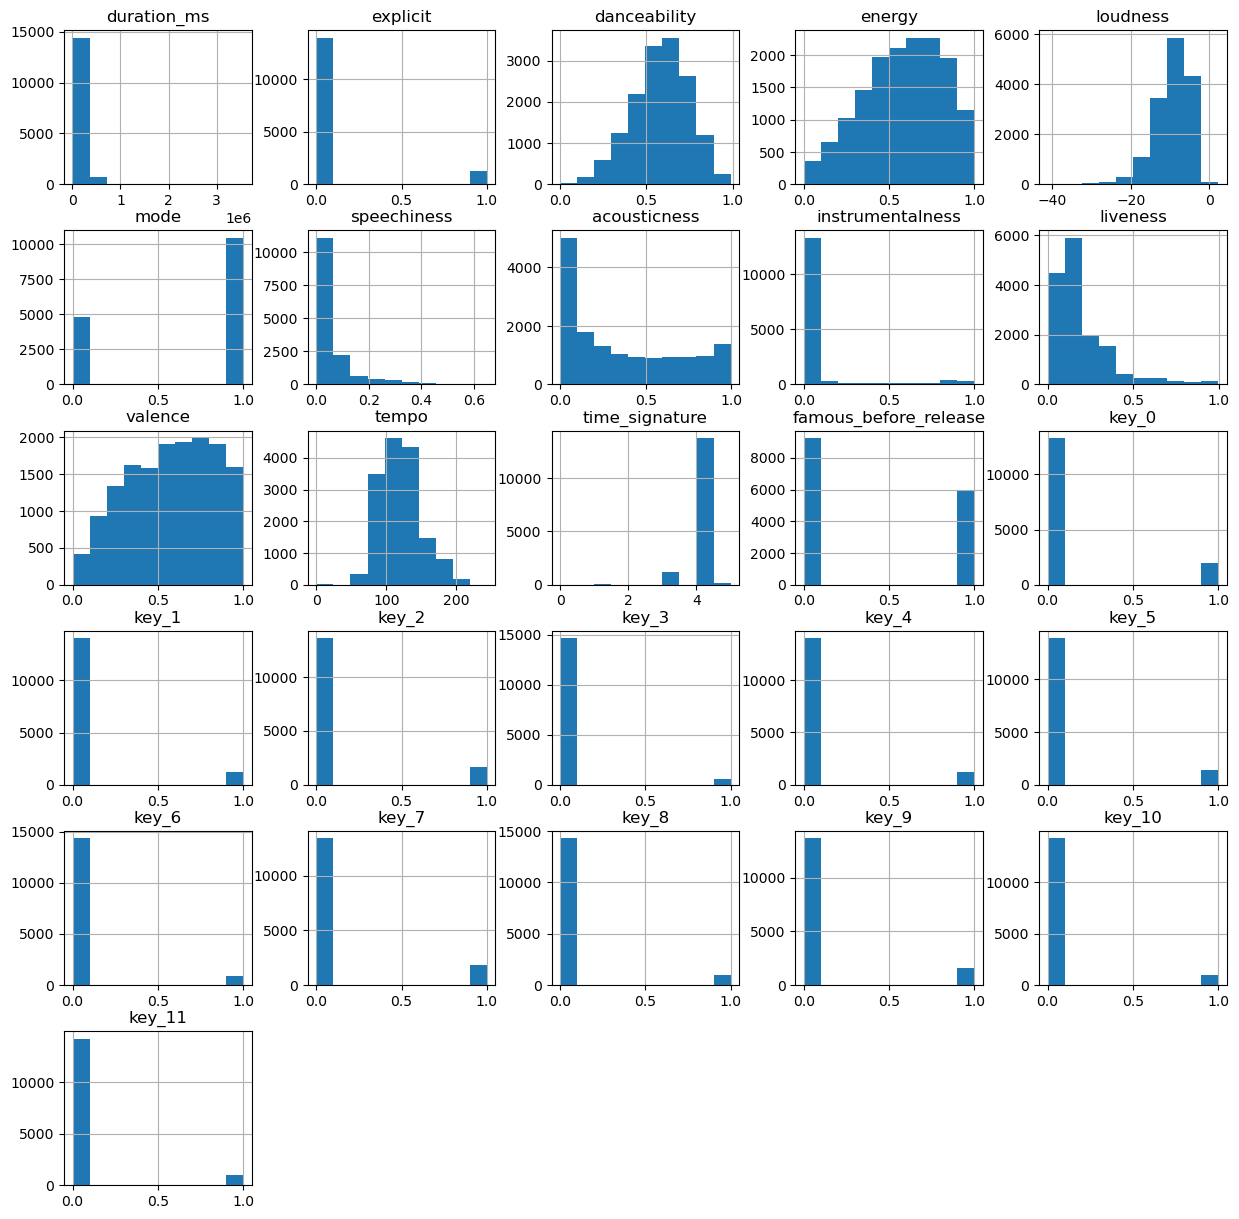

In [77]:
_ = pd.DataFrame.hist(data=hit_song_X, figsize=[15,15])

### Checking correlation so that we can drop features to prevent dimensionality curse

<Axes: >

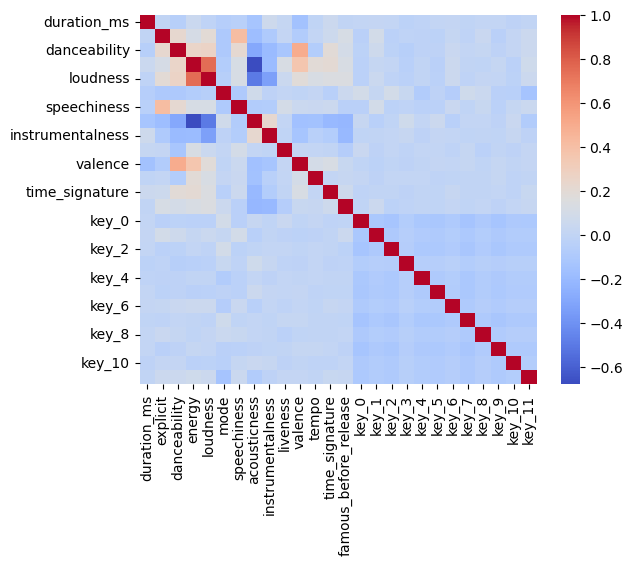

In [78]:
correlation_matrix = hit_song_X.corr()
import seaborn as sns

sns.heatmap(correlation_matrix, cmap="coolwarm")

In [79]:
corr_matrix = correlation_matrix[correlation_matrix != 1.0].dropna(axis=0, how='all').dropna(axis=1, how='all')
corr_pairs = corr_matrix.unstack()

# Sort the correlation pairs by their absolute value in descending order
sorted_pairs = corr_pairs.abs().sort_values(ascending=False)
sorted_pairs

energy        loudness        0.744863
loudness      energy          0.744863
energy        acousticness    0.680164
acousticness  energy          0.680164
              loudness        0.498926
                                ...   
key_7         key_7                NaN
key_8         key_8                NaN
key_9         key_9                NaN
key_10        key_10               NaN
key_11        key_11               NaN
Length: 676, dtype: float64

## Applying models

In [80]:
import numpy as np
from scipy import stats
from sklearn.discriminant_analysis import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


scaler = StandardScaler()
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=2023)


In [81]:
models = []

In [82]:
# Testing adding artists again
# hit_song_X = pd.concat([hit_song_X, artist_dummies], axis=1)
# hit_song_X
hit_song_X.columns

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'famous_before_release', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11'],
      dtype='object')

In [87]:
zR = DummyClassifier()

steps_zR = [('scaler', scaler), ('estimator', zR)]
pipeline_zR = Pipeline(steps_zR)
scores_zR = cross_val_score(pipeline_zR, hit_song_X, hit_song_y, cv=rkf, scoring='accuracy')
mean_zR = scores_zR.mean()
std_zR = scores_zR.std()
# inf_zR, sup_zR = stats.norm.interval(0.95, loc=mean_zR, 
#                                scale=std_zR/np.sqrt(len(scores_zR)))

print('zR')
print(f'Mean Accuracy: {mean_zR:.2f} Standard Deviation: {std_zR:.2f}')
# print ('Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n' % 
#        (inf_zR, sup_zR)) 

zR
Mean Accuracy: 1.00 Standard Deviation: 0.00


In [89]:
hit_song_train_df['hit'].value_counts()

1    15235
Name: hit, dtype: int64

### Logistic Regression

In [84]:
# import logistic regression
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()

steps_lr = [('scaler', scaler), ('estimator', lr)]
pipeline_lr = Pipeline(steps_lr)
grid_lr = {'estimator__C': [0.01, 0.1, 1, 10, 100]}
gs_lr = GridSearchCV(estimator=pipeline_lr, param_grid = grid_lr, 
                  scoring='accuracy', cv = 4)

gs_lr.fit(hit_song_X, hit_song_y)
best_model_lr = gs_lr.best_estimator_

models.append((best_model_lr, 'Logistic Regression'))



ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/philipe/anaconda3/envs/tcc/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/philipe/anaconda3/envs/tcc/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/philipe/anaconda3/envs/tcc/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1241, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1


### Gaussian Naive Bayes

### Random Forest

In [ ]:
# Apply the same code in logistic regression for random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
steps_rf = [('scaler', scaler), ('estimator', rf)]
pipeline_rf = Pipeline(steps_rf)
grid_rf = {'estimator__n_estimators': [10, 50, 100, 200], 'estimator__max_depth': [10, 100, 1000]}
gs_rf = GridSearchCV(estimator=pipeline_rf, param_grid = grid_rf,
                    scoring='accuracy', cv = 4)

gs_rf.fit(hit_song_X, hit_song_y)
best_model_rf = gs_rf.best_estimator_

models.append((best_model_rf, 'Random Forest'))

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def evaluate_models(models, X_test, y_test):
    results = []
    for model, name in models:
        test_predictions = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_predictions)
        test_recall = recall_score(y_test, test_predictions)
        test_precision = precision_score(y_test, test_predictions)
        test_f1 = f1_score(y_test, test_predictions)
        results.append({
            'model': name,
            'accuracy': test_accuracy,
            'recall': test_recall,
            'precision': test_precision,
            'f1': test_f1
        })

        # Plot confusion matrix
        cm = confusion_matrix(y_test, test_predictions)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    return pd.DataFrame(results)

In [86]:
evaluate_models(models, hit_song_test_df.drop('hit', axis=1), hit_song_test_df['hit'])

""


###